# Projeto

## Circuito

![Circuito](img/circuito.jpg)

## Simulação

In [139]:
# Vamos importar os módulos que precisamos
from cmath import *
import math
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt # type: ignore

Como ponto de partida, esoclhemos valores que, além de possuírem  sentido do ponto de vista físico para nosso projeto, também cumpriam alguns requisitos para o funcionamento da nossa aplicação escolhida.

$$ V_2continua = 5V $$

$$ i_2 = 2A $$




In [140]:
# Declarando variáveis 

#Resistores 
R1 = R2 = 0.5

#Resistor de carga
Rc= 3

#Indutores
L1 = L2 = L = 0

#Capacitores
C1 = C2 = 0.1e-6

Ufonte = 10

#lista do coeficiênte de acoplamento
PossiveisK = np.linspace(0,1,500)
kFixo = 0.2

PossiveisFreq = np.arange(1e-3,100e3,500)

In [141]:
def CalcularTransformador(k, f, R1, R2, Rc, C1, C2, L1, L2, Ufonte):

    # Indutância aproximada das bobinas
    w = 2*math.pi*f
    M = k*sqrt(L1*L2)

    # Reatâncias
    XM = 1j*w*M
    XC1 = 1/(w*C1*1j)
    XC2 = 1/(w*C2*1j)
    XL1 = 1j*w*L1
    XL2 = 1j*w*L2

    
    
    # Reatância equivalente
    Xeq = (Rc*XC2 / (Rc+XC2))
    Z = np.array([[R1+XL1+XC1, -XM], [-XM, XL2+R2+(Rc*XC2/(Rc+XC2))]])
  
    V=np.array([Ufonte,0])
    i=np.dot(linalg.inv(Z),V)

    # Corrente no primário e secundário
    i1 =  i[0]
    i2 =  i[1]
    
    # DDP e corrente na carga
    V2 = Xeq*i2
    ic = V2/Rc
    
    return i1, i2, ic, V2

def ressonancia (L, C):
    f = 1/(2*pi*sqrt(L*C))
    return f.real



    

### Escolha do capacitor

Sabendo os valores dos capacitores disponíveis no laboratório, plotamos um gráfico de tensão pela frequência para cada valor de capacitância possível, a fim de escolhermos nossa frequência e a capacitância para o projeto.




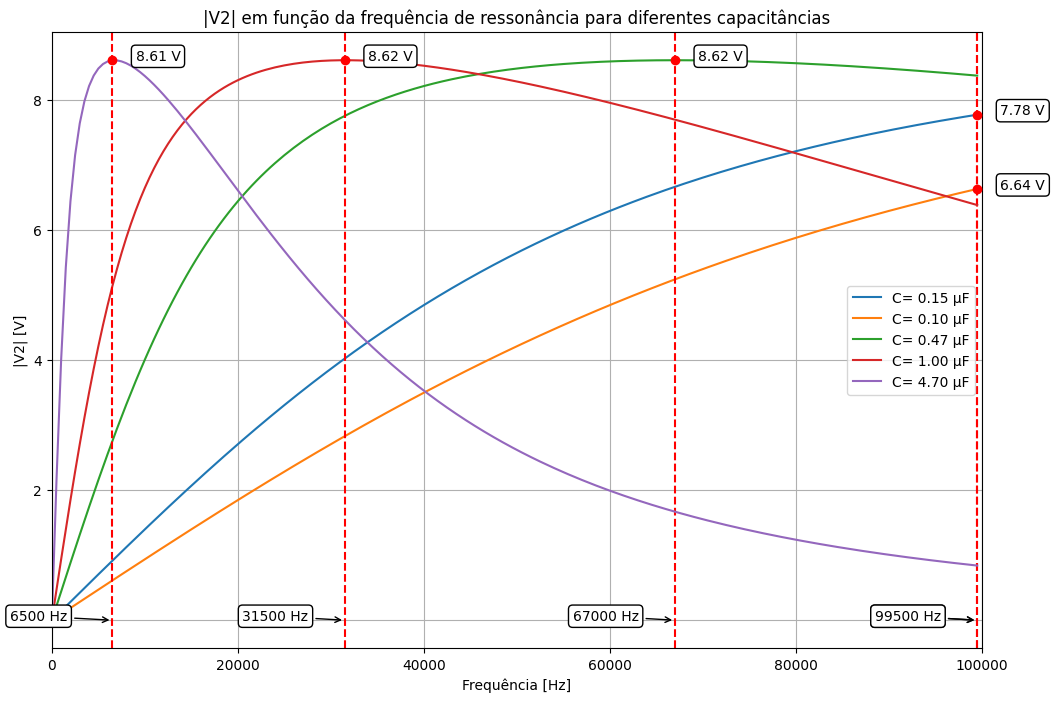

In [142]:
plt.figure(figsize=(12,8))

listaC = [150e-9, 0.1e-6, 0.47e-6, 1e-6, 4.7e-6] #lista de capacitores
listaV2total = []                                #lista da tensão no secundário
listaFreqMax = []                                #lista da frequência máxima 


for C in listaC:
    C1 = C2 = C
    listaV2 = []
    maxV2 = 0
    freqMax = 0

    for f in PossiveisFreq:
        w = 2*math.pi*f
        L1 = L2 = 1/((w**2)*C) #Indutância para ressonância
        rdc = R1 + ((2*R1)/(100*10**3))*f
        i1, i2, ic , V2 = CalcularTransformador(kFixo, f, R1, R2, Rc, C, C, L1, L2, Ufonte)

        listaV2.append(abs(V2))
        if abs(V2) > maxV2:
            maxV2 = abs(V2)
            freqMax = f

    listaV2total.append(listaV2)
    listaFreqMax.append(freqMax)
    
    plt.axvline(x=freqMax, ymin=0, ymax=1, c='r', ls='--')
    plt.annotate(f'{freqMax:.0f} Hz', (freqMax, 0), xytext=(freqMax-11000, 0), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1), arrowprops=dict(arrowstyle='->'))

    plt.scatter(freqMax, maxV2, color='red', zorder=5)
    plt.annotate(f'{round(maxV2, 2)} V', (freqMax, maxV2), xytext=(freqMax+2500, maxV2), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))

    plt.plot(PossiveisFreq, listaV2, label=f'C= {C*1e6:0.2f} µF')


plt.title("|V2| em função da frequência de ressonância para diferentes capacitâncias")
plt.xlabel("Frequência [Hz]")
plt.ylabel("|V2| [V]")
plt.xlim(0,100e3)
plt.grid(True)
plt.legend()
plt.savefig('img/capacitancias.png')
plt.show()

In [143]:
C = 0.47e-6 ## capacitor de 0.47uF foi o escolhido
freq = listaFreqMax[2] #freq de ressonância do capacitor de 0.47uF

w = 2*math.pi*freq
L1 = L2 = 1/((w**2)*C) #indutância ideal

print(f'A indutância ideal é de {L1*1e6:0.2f} µH')

A indutância ideal é de 12.01 µH


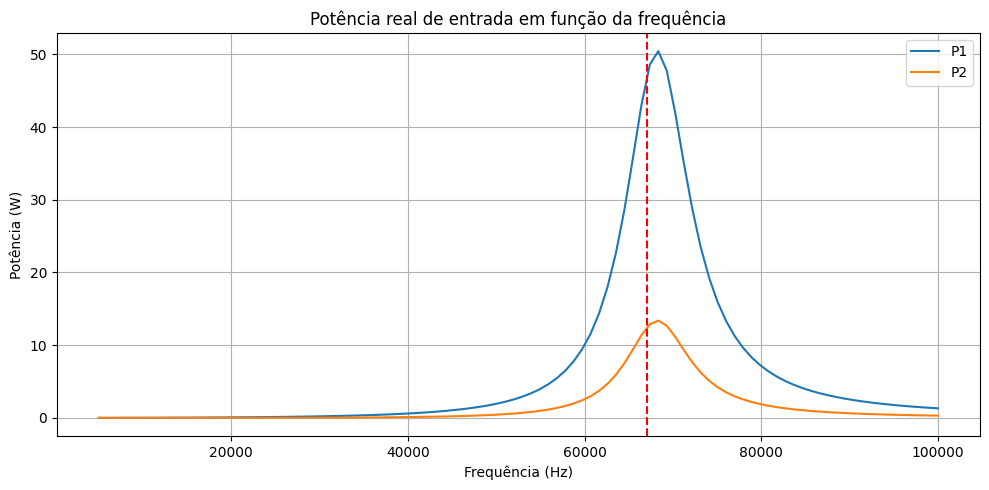

In [144]:
k = 0.2
V1 = 10 * (2 / pi)
RC = 2.5
capacitores = [0.1e-6, 0.15e-6, 0.47e-6, 1e-6, 4.7e-6]
C1 = C2 = capacitores[2]
freqs = np.linspace(5e3, 100e3, 100)

lista_P1 = []
lista_P2 = []
lista_eficiencia = []

for f in freqs:
    w = 2 * np.pi * f
    XL1 = 1j * w * L1
    XL2 = 1j * w * L2
    M = k * np.sqrt(L1 * L2)
    XM = 1j * w * M
    XC1 = -1j / (w * C1)
    XC2 = -1j / (w * C2)
    I1, I2, ic, V2 = CalcularTransformador(kFixo, f, R1, R2, Rc, C1, C2, L1, L2, Ufonte)
    P1 = (V1 / np.sqrt(2)) * (I1.conjugate() / np.sqrt(2))
    lista_P1.append(P1.real)
    P2 = (V2 / np.sqrt(2)) * (I2.conjugate() / np.sqrt(2))
    lista_P2.append(P2.real)
    lista_eficiencia.append(P2.real / P1.real)

plt.figure(figsize=(10, 5))


plt.plot(freqs, lista_P1, label='P1')
plt.plot(freqs, lista_P2, label='P2')
plt.title("Potência real de entrada em função da frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")
#linha onde f = 67 000 Hz
plt.axvline(x=67000, ymin=0, ymax=1, c='r', ls='--')
plt.legend()
plt.grid()





plt.tight_layout()
plt.show()

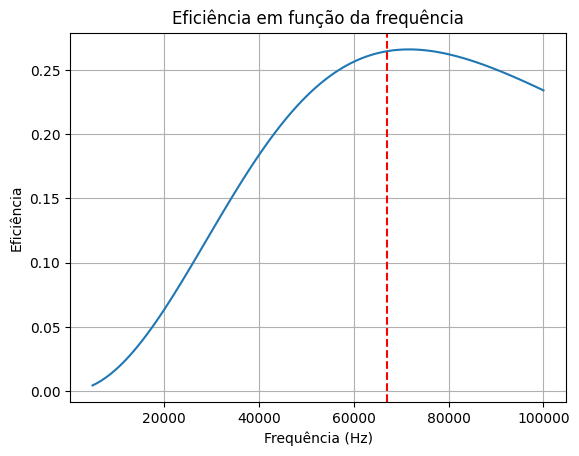

In [145]:
plt.plot(freqs, lista_eficiencia)
plt.title("Eficiência em função da frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Eficiência")
plt.grid()
#linha onde f = 67 000 Hz
plt.axvline(x=67000, ymin=0, ymax=1, c='r', ls='--')
plt.savefig('img/eficienciavsfreq.png')
plt.show()

In [146]:
print(f'A eficiencia na frequência de 67kHz é de {lista_eficiencia[65]:.2f}')
print(f'A potência real de entrada na frequência de 67kHz é de {lista_P1[65]:.2f}W')
print(f'A potência real de saída na frequência de 67kHz é de {lista_P2[65]:.2f}W')


A eficiencia na frequência de 67kHz é de 0.26
A potência real de entrada na frequência de 67kHz é de 48.61W
A potência real de saída na frequência de 67kHz é de 12.87W


####  Construção de um gráfico que relacione o valor de pico da tensão no secundário (no resistor 𝑅𝐶) com o coeficiente de acoplamento k 

Para essa atividade, usamos a frequência de ressonância natural do conjunto 𝐿𝐶, que ficará fixa para diferentes valores de 𝑘. 

A ideia, com a simulação, é identificar se existe um fator de acoplamento ótimo, com o qual a tensão no secundário é máxima (e, por conseguinte, a potência recebida também será máxima).

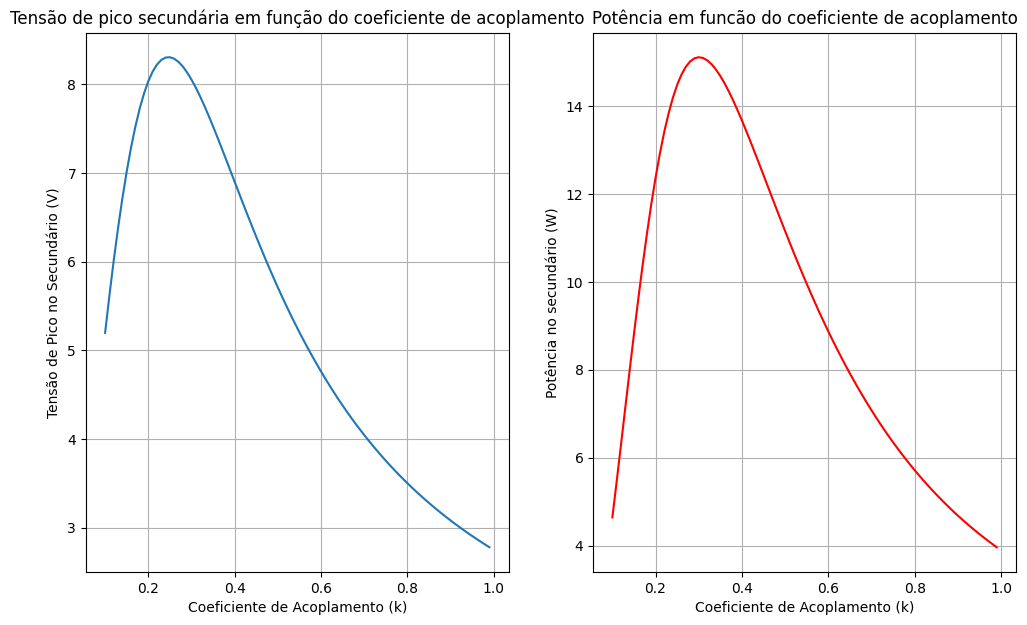

In [147]:
V1 = 10 * (2 / np.pi)

freq = ressonancia(L1, C1) 

ks = np.arange(0.1, 1, 0.01)

voltagens_secundario = []
Potencias_secundario = []


for k in ks:
    i1,i2,ic ,V2_peak = CalcularTransformador(k, freq, R1, R2, Rc, C1, C2, L1, L2, Ufonte)
    P2 = (V2_peak / np.sqrt(2)) * (i2.conjugate() / np.sqrt(2))
    voltagens_secundario.append(V2_peak)
    Potencias_secundario.append(P2)

plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
plt.plot(ks, voltagens_secundario)
plt.title("Tensão de pico secundária em função do coeficiente de acoplamento")
plt.xlabel("Coeficiente de Acoplamento (k)")
plt.ylabel("Tensão de Pico no Secundário (V)")
plt.grid()

plt.subplot(1,2,2)
plt.plot(ks,Potencias_secundario, color='red')
plt.title('Potência em funcão do coeficiente de acoplamento')
plt.xlabel("Coeficiente de Acoplamento (k)")
plt.ylabel("Potência no secundário (W)")
plt.grid()
plt.show()



# Trabalhando com os valores reais

Após a medição das indutâncias e resistencias para as bobinas montadas, plotamos alguns graficos para auxiliar na escolha do k

In [148]:
R1 = 0.124
R2 = 0.097

Rc = 3 

L1 = 14.13e-6
L2 = 10.69e-6

C1 = C2 = 0.47e-6

f = 67000

Ufonte = 12*2/pi


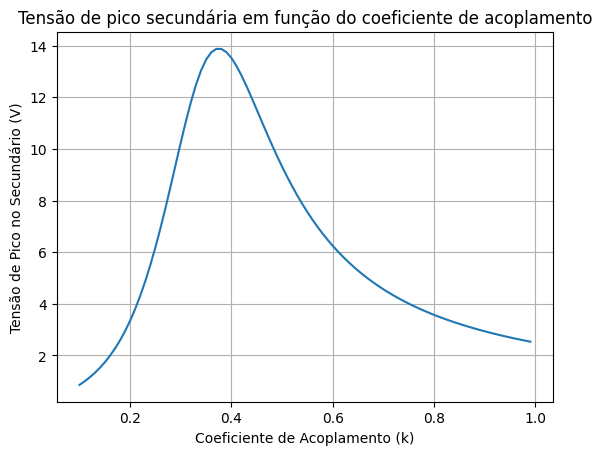

In [149]:
V1 = 12 * (2 / np.pi)



ks = np.arange(0.1, 1, 0.01)

voltagens_secundario = []
Potencias_secundario = []


for k in ks:
    i1,i2,ic ,V2_peak = CalcularTransformador(k, f, R1, R2, Rc, C1, C2, L1, L2, Ufonte)
    P2 = V2_peak**2/Rc
    voltagens_secundario.append(V2_peak)
    Potencias_secundario.append(P2)



plt.plot(ks, voltagens_secundario)
plt.title("Tensão de pico secundária em função do coeficiente de acoplamento")
plt.xlabel("Coeficiente de Acoplamento (k)")
plt.ylabel("Tensão de Pico no Secundário (V)")
plt.grid()






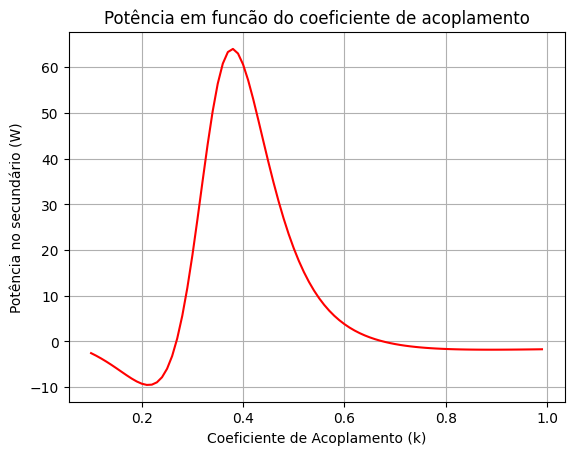

In [150]:
plt.plot(ks,Potencias_secundario, color='red')
plt.title('Potência em funcão do coeficiente de acoplamento')
plt.xlabel("Coeficiente de Acoplamento (k)")
plt.ylabel("Potência no secundário (W)")
plt.grid()
plt.show()

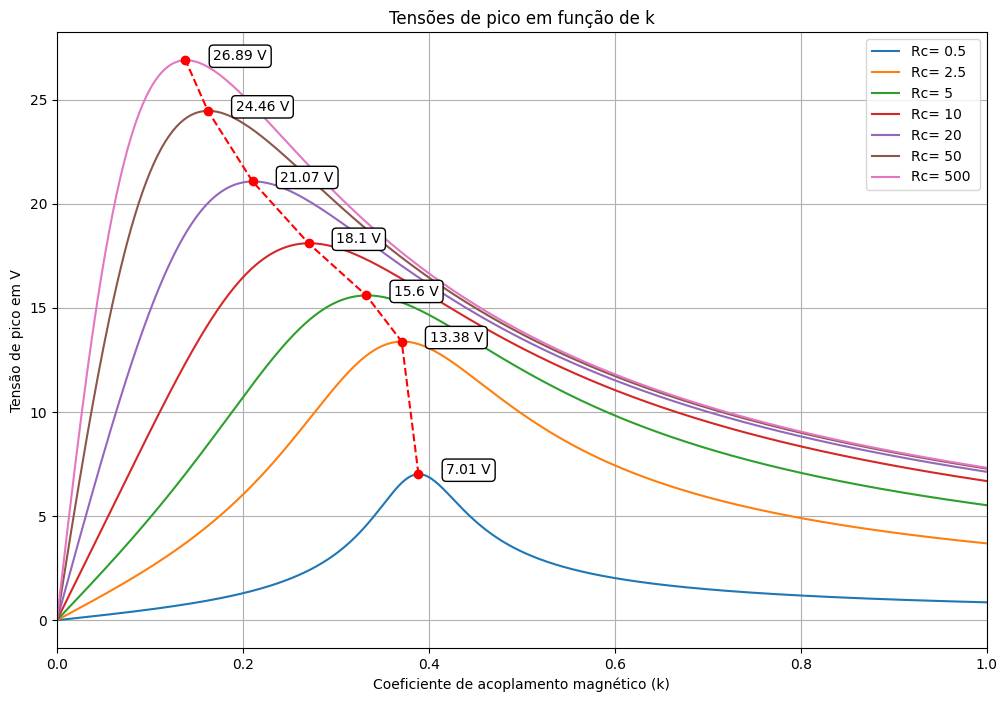

In [151]:
plt.figure(figsize=(12,8))

listaR = [0.5,2.5,5,10,20,50,500]
listaV2total = []
listaKMax = []
listaMaxV2 = []


for R in listaR:
    Rc = R
    listaV2 = []
    maxV2 = 0
    kMax = 0

    for k in PossiveisK:
        w = 2*math.pi*f
        i1, i2, ic , V2 = CalcularTransformador(k, f, R1, R2, Rc, C1, C2, L1, L2, Ufonte)

        listaV2.append(abs(V2))
        if abs(V2) > maxV2:
            maxV2 = abs(V2)
            kMax = k

    listaV2total.append(listaV2)
    listaKMax.append(kMax)
    listaMaxV2.append(maxV2)
    
    # plt.axvline(x=kMax, ymin=0, ymax=1, c='r', ls='--')
    # plt.annotate(f'{kMax:.0f} Hz', (kMax, 0), xytext=(kMax-11000, 0), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1), arrowprops=dict(arrowstyle='->'))

    plt.scatter(kMax, maxV2, color='red', zorder=5)
    plt.annotate(f'{round(maxV2, 2)} V', (kMax, maxV2), xytext=(kMax+0.03, maxV2), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))

    plt.plot(PossiveisK, listaV2, label=f'Rc= {Rc} ')

plt.plot(listaKMax, listaMaxV2, color='red', linestyle='--')

plt.title("Tensões de pico em função de k")
plt.xlabel("Coeficiente de acoplamento magnético (k)")
plt.ylabel("Tensão de pico em V")
plt.xlim(0,1)
plt.grid(True)
plt.legend()
plt.savefig('img/kpossiveis.png')
plt.show()

In [152]:
L = 12e-6
C = 0.47e-6

f_ressonancia = 1/(2*math.pi*math.sqrt(L*C))

print(f"Frequência de Ressonância: {f_ressonancia:.2f} Hz")

Frequência de Ressonância: 67016.32 Hz


Após as devidas simulações e com nosso protótipo em pleno funcionamento, obtemos dados a fim de ilustrar o funcionamento do nosso carregador em detrimento da distância entre as bobinas e a voltagem imprimida no circuito

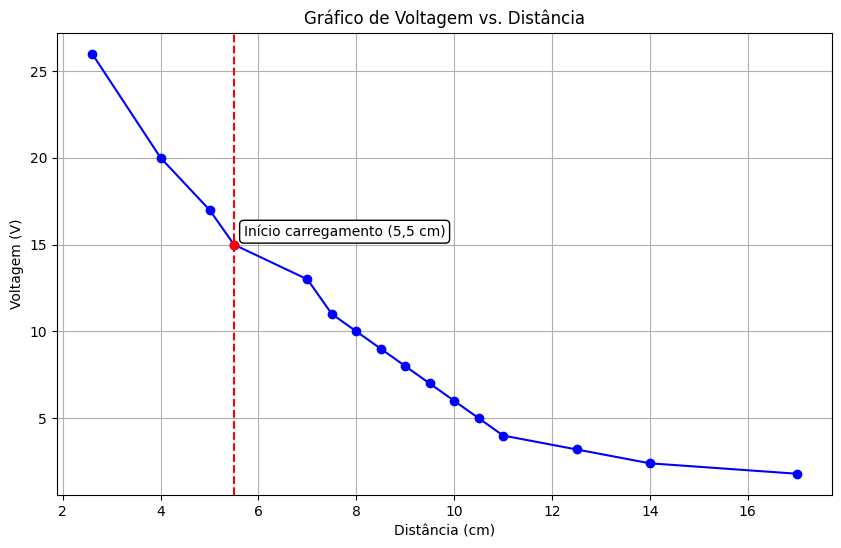

In [153]:
distancia = [17, 14, 12.5, 11, 10.5, 10, 9.5, 9, 8.5, 8, 7.5, 7, 5.5, 5, 4, 2.6]
voltagem = [1.8, 2.4, 3.2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 20, 26]
inicio_carregamento = 5.5
v2_inicio_carregamento = 15

plt.figure(figsize=(10, 6))
plt.plot(distancia, voltagem, marker='o', linestyle='-', color='b')
plt.scatter(inicio_carregamento, v2_inicio_carregamento, color='red', zorder=5)
plt.axvline(x=inicio_carregamento, ymin=0, ymax=1, c='r', ls='--')
plt.annotate(f'Início carregamento (5,5 cm)', (inicio_carregamento, v2_inicio_carregamento), xytext=(inicio_carregamento+0.2, v2_inicio_carregamento+0.5), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
plt.title('Gráfico de Voltagem vs. Distância')
plt.xlabel('Distância (cm)')
plt.ylabel('Voltagem (V)')
plt.grid(True)
plt.show()